In [96]:
include("../src/project.jl")

getprojectdir (generic function with 1 method)

In [ ]:
### definition of PosMatrix type

# struct PosMatrixCompressed{T, V, W}
#     name::String
#     modifications::Dict{String, Int}
#     nummods::Int
#     modfields::Int
#     numreads::Int
#     readfields::Int
#     chromindex::Dict{String, UnitRange{Int}}
#     chromrindex::Dict{Int, String}
#     readindex::V
#     readivs::IntervalCollection{W}
#     dataencoding::DataType
#     PM::T

# end

In [6]:
PMS = load_smf_data("/Users/ndlo201/University of Exeter/Gene Regulatory Defects in Disease - Documents/data/ont/posmatrix/")

files = ["/Users/ndlo201/University of Exeter/Gene Regulatory Defects in Disease - Documents/data/ont/posmatrix/hek293_m6a.chromfix.sort.posbin", "/Users/ndlo201/University of Exeter/Gene Regulatory Defects in Disease - Documents/data/ont/posmatrix/mi_02_05_24_basecall_6mA_5mCG_5hmCG.hg19.sort.posbin"]


2-element Vector{SMFTools.PosMatrixCompressed{UnalignedVectors.UnalignedVector{UInt8}, Base.ReshapedArray{Int64, 2, UnalignedVectors.UnalignedVector{Int64}, Tuple{}}, Int64}}:
 SMFTools.PosMatrixCompressed{UnalignedVectors.UnalignedVector{UInt8}, Base.ReshapedArray{Int64, 2, UnalignedVectors.UnalignedVector{Int64}, Tuple{}}, Int64}("/Users/ndlo201/University of Exeter/Gene Regulatory Defects in Disease - Documents/data/ont/posmatrix/hek293_m6a.chromfix.sort.posbin", Dict("6mA" => 1, "5mC" => 2), 4685472231, 2, 4774648, 7, Dict{String, UnitRange{Int64}}("chr4_gl000193_random" => 4731396:4732179, "chr9_gl000198_random" => 4763942:4764310, "chrUn_gl000246" => 4766398:4766433, "chr1_gl000192_random" => 4726579:4727658, "chr19" => 4477496:4586987, "chr4_gl000194_random" => 4730594:4731395, "chrUn_gl000215" => 4736222:4736335, "chr8_gl000197_random" => 4766499:4766515, "chrUn_gl000244" => 4766271:4766294, "chrUn_gl000238" => 4766205:4766270…), Dict(5 => "chr5", 56 => "chrUn_gl000214", 35 => 

In [30]:
prod(size(PMS[1].readindex))*sizeof(Int64)/1024/1024

254.99371337890625

In [31]:
prod(size(PMS[1].PM))*sizeof(UInt8)/1024/1024

4468.414526939392

In [13]:
size(PMS[1].readindex)

(7, 4774648)

In [33]:
PMS[1].readindex .+ 1

7×4774648 reshape(::UnalignedVectors.UnalignedVector{Int64}, 7, 4774648) with eltype Int64:
    -1     -1     -1     -1      1  …          93         -93          93
 10001  10001  10001  10001  10082           1778        1959        2967
 13714  18202  17518  15667  29414           4255        4255        4246
     1   1065   2654   4431   5803     4685471538  4685471818  4685472058
   123   1464   3052   4727   7915     4685471690  4685471961  4685472159
   124   1465   3053   4728   7916  …  4685471691  4685471962  4685472160
  1064   2653   4430   5802  13717     4685471817  4685472057  4685472231

In [49]:
readdf = DataFrame(PMS[1].readindex[:, 1:10]', [:chromstrand, :genomestart, :genomestop, :mod_6mA_start, :mod_6mA_stop, :mod_5mC_start, :mod_5mC_stop])
readdf.chrom = getindex.(Ref(PMS[1].chromrindex), last.(GenomeFragments.get_strand_chrom_enc.(readdf.chromstrand)))
readdf.strand = first.(GenomeFragments.get_strand_chrom_enc.(readdf.chromstrand))
readdf

10×9 DataFrame
 Row │ chromstrand  genomestart  genomestop  mod_6mA_start  mod_6mA_stop  mod_ ⋯
     │ Int64        Int64        Int64       Int64          Int64         Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │          -1        10001       13714              1           123       ⋯
   2 │          -1        10001       18202           1065          1464
   3 │          -1        10001       17518           2654          3052
   4 │          -1        10001       15667           4431          4727
   5 │           1        10082       29414           5803          7915       ⋯
   6 │           1        10095       19092          13718         14103
   7 │           1        10101       19259          15926         16768
   8 │           1        10155       17837          17562         18673
   9 │           1        10208       15968          19830         20286       ⋯
  10 │           1        10249       13314          21358         21597
                                                               4 columns omitted

In [75]:
function get_mod_data(readindex, modification, PM)
    mi = PM.modifications[modification]
    off = (mi - 1)*2
    rind = off .+ 3 .+ (1:2)
    pind = PM.readindex[rind[1], readindex]:PM.readindex[rind[2], readindex]
    d = decompress(Int32, PM.PM[pind])
    reshape(d, 2, div(length(d), 2))
end

get_mod_data (generic function with 1 method)

In [78]:
data_6mA = get_mod_data(1, "6mA", PMS[1])

2×30 Matrix{Int32}:
 10291  10363  10381  10407  10468  …  12946  12948  12952  13074  13188
    24    134      7     16      1         2      4      2      3      1

In [79]:
data_5mC = get_mod_data(1, "5mC", PMS[1])

2×392 Matrix{Int32}:
 10101  10470  10482  10483  10486  …  13671  13694  13696  13698  13705
    11      3     41     26      7        14     76      7      1     23

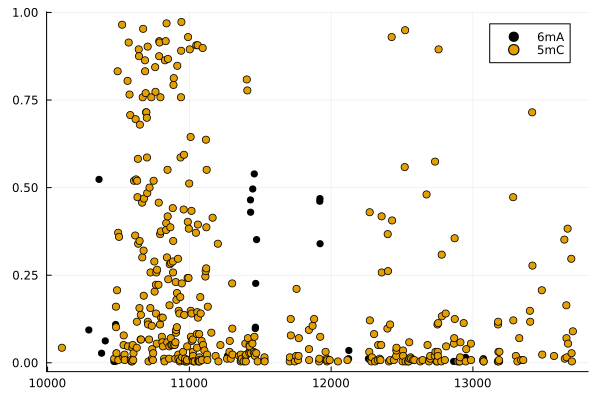

In [85]:
#  Plots
plot()
scatter!(data_6mA[1, :], data_6mA[2, :]./256, lab="6mA")
scatter!(data_5mC[1, :], data_5mC[2, :]./256, lab="5mC")

In [ ]:
data

In [71]:
## first row is genomic position
## second row is the probability that the sequencer assigned to base being modified

data_6ma = reshape(decompress(Int32, PMS[1].PM[1:123]), 2, 30)

2×30 Matrix{Int32}:
 10291  10363  10381  10407  10468  …  12946  12948  12952  13074  13188
    24    134      7     16      1         2      4      2      3      1

In [57]:
134/256

0.5234375

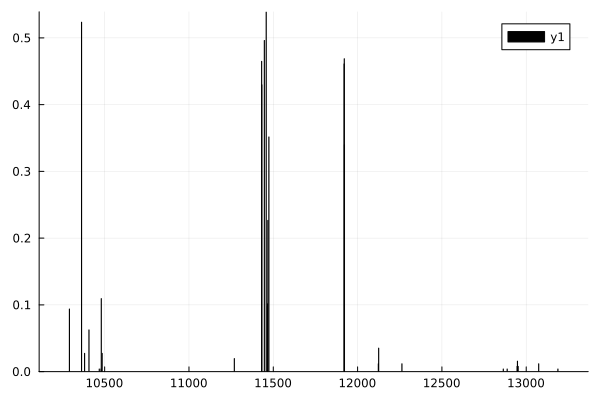

In [62]:
bar(data[1, :], data[2, :]./256)

In [97]:
peakmotif = load_tf_data("/Users/ndlo201/University of Exeter/Gene Regulatory Defects in Disease - Documents/data/islets/peakmotif/")

Dict{SubString{String}, DataFrame} with 6 entries:
  "FOXA2" => 64178×14 DataFrame…
  "NKX2"  => 72218×14 DataFrame…
  "NKX6"  => 14067×14 DataFrame…
  "MAFB"  => 20961×14 DataFrame…
  "PDX1"  => 27914×14 DataFrame…
  "CTCF"  => 34403×14 DataFrame…

In [104]:
peakmotif["CTCF"]

10×14 DataFrame
 Row │ chrom     start    stop     TotalPeaks  score    Origin       totalmoti ⋯
     │ String31  Int64    Int64    Int64       Float64  String15     Int64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ chr1       873435   874066           3  431.667  islets_CTCF            ⋯
   2 │ chr1       911304   911770           3  441.333  islets_CTCF
   3 │ chr1       919227   919901           3  278.667  islets_CTCF
   4 │ chr1       937233   937611           3  343.0    islets_CTCF
   5 │ chr1       954547   954892           3  125.333  islets_CTCF            ⋯
   6 │ chr1       999081   999671           3  590.0    islets_CTCF
   7 │ chr1      1057289  1057801           3  891.333  islets_CTCF
   8 │ chr1      1225596  1225884           3  300.333  islets_CTCF
   9 │ chr1      1227226  1227620           3  737.333  islets_CTCF            ⋯
  10 │ chr1      1280006  1280346           3  122.0    islets_CTCF
                                                               8 columns omitted

In [116]:
dw = 1000
xp = -dw:dw
cls = @with peakmotif["CTCF"] (:chrom, [div(s + e, 2) .+ (-dw:dw) for (s, e) in zip(:motifstart, :motifstop)], :strand)
ctcf_ivs = IntervalCollection(Interval.(cls[1], cls[2], first.(cls[3]), 1:length(cls[1])));

In [100]:
ctcf_ivs

IntervalCollection{Int64} with 34403 intervals:
  chr1:872631-874631  -  1
  chr1:910597-912597  -  2
  chr1:918706-920706  +  3
  chr1:936415-938415  -  4
  chr1:953830-955830  +  5
  chr1:998353-1000353  -  6
  chr1:1056652-1058652  +  7
  chr1:1224720-1226720  -  8
  ⋮

In [109]:
mean_6ma = modmeta(ctcf_ivs, PMS[1], "6mA");
mean_5mC = modmeta(ctcf_ivs, PMS[1], "5mC");

In [114]:
zscore(x)  = (x .- mean(x))./std(x)

zscore (generic function with 1 method)

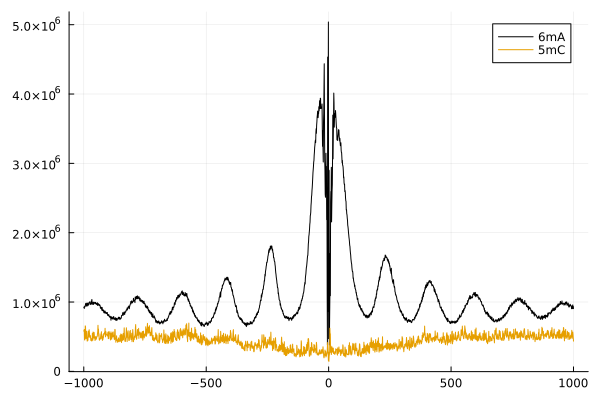

In [118]:
plot()
plot!(xp, mean_6ma[1], lab="6mA")
plot!(xp, mean_5mC[1], lab="5mC")

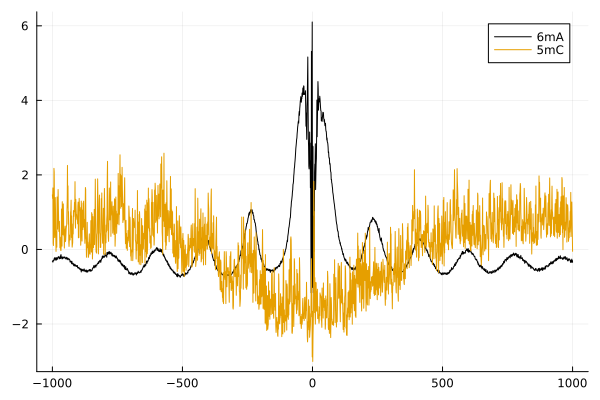

In [117]:
plot()
plot!(xp, zscore(mean_6ma[1]), lab="6mA")
plot!(xp, zscore(mean_5mC[1]), lab="5mC")

In [129]:
qc_6mA = SMFTools.modmetaqc(ctcf_ivs, PMS[1], "6mA")
qc_5mC = SMFTools.modmetaqc(ctcf_ivs, PMS[1], "5mC")

([1222.0 733.0 … 1.0 0.0; 1359.0 771.0 … 3.0 0.0; … ; 1372.0 750.0 … 1.0 0.0; 1296.0 702.0 … 1.0 0.0], 655289001)

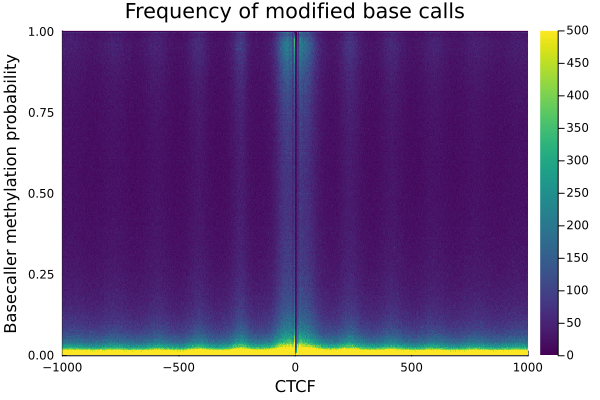

In [133]:
heatmap(-dw:dw, range(0, 1, length=256), qc_6mA[1]', clims=(0, 500), ylabel="Basecaller methylation probability", xlabel="CTCF", title="Frequency of modified base calls")

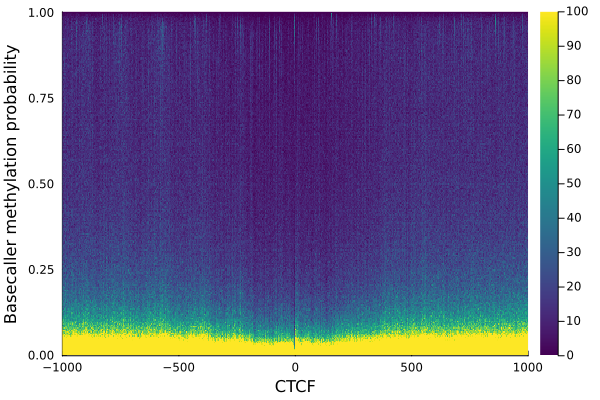

In [132]:
heatmap(-dw:dw, range(0, 1, length=256), qc_5mC[1]', clims=(0, 100), ylabel="Basecaller methylation probability", xlabel="CTCF")

In [134]:
mods_6mA = modheat(ctcf_ivs, PMS[1], "6mA")

([0.0 0.0 … 0.0 0.0; 92.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], 655289001)